In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# import data set
ords_custs_merged_2 = pd.read_pickle(r'C:\Users\mateu\Desktop\Master_Folder\02 Data\Prepared Data\ords_prods_customers_merged_2.pkl')

In [3]:
# path
path = r'C:\Users\mateu\Desktop\Master_Folder\04 Analysis\Visualizations\Vizual6'

In [4]:
# check
pd.options.display.max_columns = None
ords_custs_merged_2.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,Busiest_day,Busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,Surname,Gender,State,Age,date_joined,Number_of_dependants,fam_status,income,day_of_week,region,activity_flag,Age_distribution,income_group
0,2539329,1,1,2,8,NaN,True,196,1.0,0.0,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K
1,2539329,1,1,2,8,NaN,True,14084,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K
2,2539329,1,1,2,8,NaN,True,12427,3.0,0.0,Original Beef Jerky,23.0,19.0,4.4,both,NaN,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K
3,2539329,1,1,2,8,NaN,True,26088,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,NaN,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K
4,2539329,1,1,2,8,NaN,True,26405,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,NaN,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K


In [6]:
# Check data types
ords_custs_merged_2.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
order_dow                    int64
order_hour_of_day            int64
days_since_prior_order     float64
first_order                   bool
product_id                   int32
add_to_cart_order          float64
reordered                  float64
product_name                object
aisle_id                   float64
department_id              float64
prices                     float64
_merge                    category
price_range_loc             object
busiest_day                 object
Busiest_day                 object
Busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
spending                   float64
spending_flag               object
frequency                  float64
frequency_flag              object
Surname                     object
Gender                      object
State                       object
Age                 

###  Create a profiling variable based on age and family status


In [8]:
ords_custs_merged_2 ['Age'].min()

18

In [9]:
ords_custs_merged_2 ['Age'].max()

81

In [211]:
# check
ords_custs_merged_2 ['Age_distribution'].value_counts().sort_index()

Age_18-25     4074823
Age_26-41     8158836
Age_42-57     8247085
Age_58>      12160524
Name: Age_distribution, dtype: int64

<function matplotlib.pyplot.subplot(*args, **kwargs)>

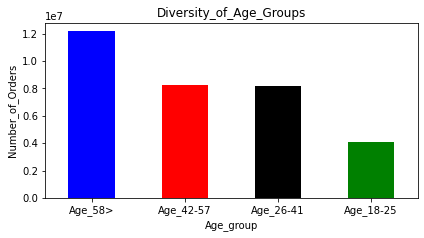

In [218]:
age_bar = ords_custs_merged_2['Age_distribution'].value_counts().plot.bar(color =['blue','red','black','green'], xlabel= 'Age_group', ylabel= 'Number_of_Orders', title = 'Diversity_of_Age_Groups')
plt.tight_layout()
plt.xticks(rotation=0)
plt.subplot




In [5]:
# saving
age_bar.figure.savefig(os.path.join(path,'age_group'))


In [7]:
# Age and family status
age_fam_stat = pd.crosstab(ords_custs_merged_2['Age_distribution'], ords_custs_merged_2 ['fam_status'], dropna = False)

In [8]:
age_fam_stat

fam_status,divorced/widowed,living with parents and siblings,married,single
Age_distribution,,,,
Age_18-25,0,1561916,1507947,1004960
Age_26-41,0,0,6108304,2050532
Age_42-57,0,0,6211791,2035294
Age_58>,2792100,0,9094363,274061


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Age_18-25'),
  Text(1, 0, 'Age_26-41'),
  Text(2, 0, 'Age_42-57'),
  Text(3, 0, 'Age_58>')])

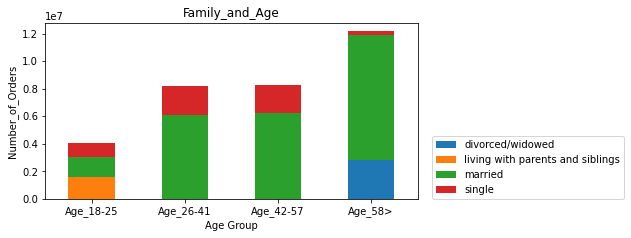

In [9]:
# Age and family bar chart
age_family_stack = age_fam_stat.plot.bar(title = 'Family_and_Age', xlabel= 'Age Group', ylabel= 'Number_of_Orders', stacked = True)
plt.tight_layout()
plt.legend(loc=(1.04,0))
plt.xticks(rotation=0)

In [10]:
# saving
age_family_stack.figure.savefig(os.path.join(path,'Family_stack'))

### Create a profiling variable based on income

In [43]:
ords_custs_merged_2['income_group'].dtypes

dtype('O')

In [11]:
# Creating a crosstab with Income distribution
income = pd.crosstab(ords_custs_merged_2['income_group'],ords_custs_merged_2['Age_distribution'], dropna = False)

In [12]:
income

Age_distribution,Age_18-25,Age_26-41,Age_42-57,Age_58>
income_group,,,,
<32K,113490,213722,74579,121724
107K-374K,53548,394196,5014726,7396754
32K-53K,671008,1282555,712505,1022508
53K-107K,3235849,6261724,2421589,3591561
>374K,928,6639,23686,27977


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' <32K'),
  Text(1, 0, '107K-374K'),
  Text(2, 0, '32K-53K'),
  Text(3, 0, '53K-107K'),
  Text(4, 0, '>374K')])

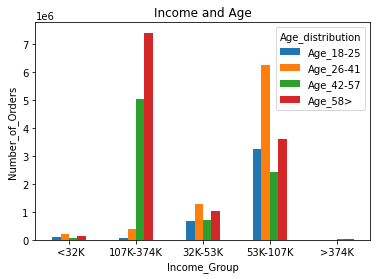

In [14]:
income_age= income.plot.bar(title='Income and Age',xlabel='Income_Group',ylabel='Number_of_Orders')
plt.tight_layout
plt.xticks(rotation=0)

In [15]:
# saving
income_age.figure.savefig(os.path.join(path,'Income_Age'))

In [16]:
# Corelation between age and number of orders
loyality_age = pd.crosstab(ords_custs_merged_2['Age_distribution'],ords_custs_merged_2['loyalty_flag'], dropna = False)

In [17]:
loyality_age

loyalty_flag,Loyal customer,New customer,Regular customer
Age_distribution,,,
Age_18-25,1323104,701218,2050501
Age_26-41,2647178,1386919,4124739
Age_42-57,2716958,1405129,4124998
Age_58>,3992338,2086952,6081234


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Age_18-25'),
  Text(1, 0, 'Age_26-41'),
  Text(2, 0, 'Age_42-57'),
  Text(3, 0, 'Age_58>')])

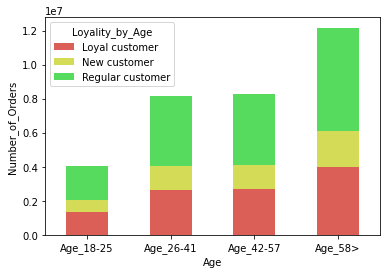

In [19]:
# loyalty and age
loyal_age= loyality_age.plot.bar (stacked = True, color= sns.color_palette('hls'),xlabel= 'Age',ylabel= 'Number_of_Orders')
plt.legend(title= 'Loyality_by_Age')
plt.tight_layout
plt.xticks(rotation=0)

In [20]:
# saving
loyal_age.figure.savefig(os.path.join(path,'Loyality2.png'))

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

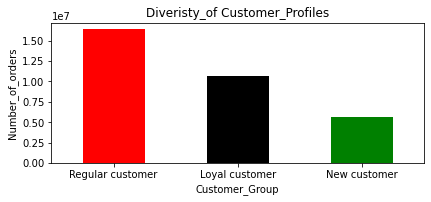

In [22]:
# Number of loyal customers
loyal_custs=ords_custs_merged_2['loyalty_flag'].value_counts().plot.bar(color =['red','black','green'], xlabel= 'Customer_Group', ylabel= 'Number_of_orders', title = 'Diveristy_of Customer_Profiles')
plt.tight_layout()
plt.xticks(rotation=0)

In [86]:
# saving
loyal_custs.figure.savefig(os.path.join(path,'Loyality3'))

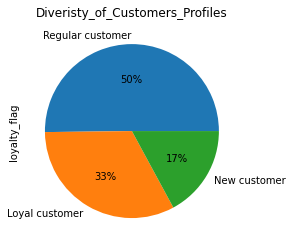

In [90]:
# Distribution of customers
pie_loyal =ords_custs_merged_2 ['loyalty_flag'].value_counts().plot.pie(title= 'Diveristy_of_Customers_Profiles',autopct='%1.0f%%')

In [92]:
#saving
pie_loyal.figure.savefig(os.path.join(path,'Loyality4'))

In [13]:
# income and order of the day
income_hour= pd.crosstab(ords_custs_merged_2['income_group'],ords_custs_merged_2['order_hour_of_day'], dropna = False)

In [14]:
income_hour

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
income_group,,,,,,,,,,,,,,,,,,,,,,,,
<32K,3726,1574,1154,842,817,1192,3994,12317,27464,49466,55244,46665,41820,42339,42494,41511,39776,31357,22964,17909,13551,10552,8402,6385
107K-374K,85992,44671,26855,19748,21154,35461,116078,359684,682501,954627,1071333,1069001,1038311,1056651,1069030,1058391,1011951,837271,659436,510565,394961,321128,252810,161614
32K-53K,22973,12822,8438,6127,6011,9637,30368,94932,194795,314546,348844,332201,298648,298248,299058,293237,282533,234537,179361,133680,101072,79394,63825,43289
53K-107K,107473,57322,33356,24883,25504,42099,141540,428184,821983,1148133,1301171,1302233,1253208,1278263,1294024,1283417,1215152,996766,785016,604256,471713,389002,312959,193066
>374K,173,200,101,75,150,272,553,2046,3128,4295,4417,5269,5546,4670,4478,5534,4698,4294,3093,1955,1935,976,675,697


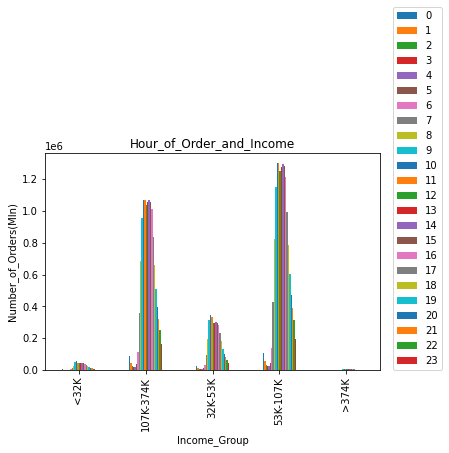

In [17]:
# Income and time of order
Hour= income_hour.plot.bar (title='Hour_of_Order_and_Income',xlabel='Income_Group',ylabel='Number_of_Orders(Mln)')
plt.legend(loc=(1.04,0))



In [18]:
# creating new column to make it more clear( I am going to divide day into morning,afternoon and Evening)

In [24]:
# Creating  new column During day
timeof = []

for value in ords_custs_merged_2['order_hour_of_day']:
    if value <= 11: 
        timeof.append('Morning')
    elif (value > 11) and (value <= 17):
        timeof.append('Afternoon')
    elif (value > 17) and (value <= 24):
        timeof.append('Evening')
    else: 
        timeof.append('later')

In [25]:
timeof

['Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 '

In [26]:
# adding new column
ords_custs_merged_2['Time_of_the_Day']= timeof


In [28]:
#Check
ords_custs_merged_2['Time_of_the_Day']. value_counts()

Afternoon    15367213
Morning      11527814
Evening       5746241
Name: Time_of_the_Day, dtype: int64

In [29]:
# Income and time of order 2
time_income = pd.crosstab(ords_custs_merged_2['income_group'],ords_custs_merged_2['Time_of_the_Day'], dropna = False)

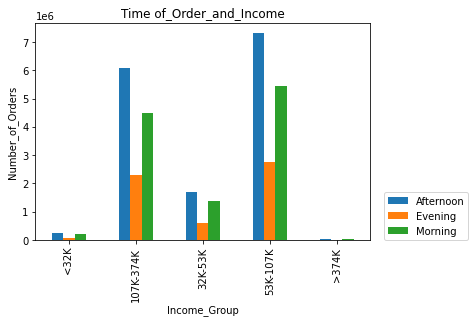

In [30]:
time_income_2= time_income.plot.bar (title='Time of_Order_and_Income',xlabel='Income_Group',ylabel='Number_of_Orders')
plt.legend(loc=(1.04,0))

In [33]:
# saving
time_income_2.figure.savefig(os.path.join(path,'timeofincome.png'))


In [31]:
# spending_flag and loyality
spen_loyal=pd.crosstab(ords_custs_merged_2['frequency_flag'],ords_custs_merged_2['spending_flag'], dropna = False)

In [34]:
spen_loyal

spending_flag,High Spender,Low Spender
frequency_flag,,
Frequent customer,428347,21210841
Non-frequent customer,69665,3644946
Regular customer,142023,7145446


(array([0, 1, 2]),
 [Text(0, 0, 'Frequent customer'),
  Text(1, 0, 'Non-frequent customer'),
  Text(2, 0, 'Regular customer')])

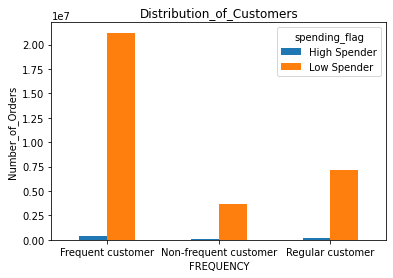

In [36]:
loyal_spen=spen_loyal.plot.bar(title ='Distribution_of_Customers',xlabel= 'FREQUENCY',ylabel='Number_of_Orders')
plt.xticks(rotation=0)

In [37]:
# saving
loyal_spen.figure.savefig(os.path.join(path,'Spender_loyal.png'))

In [71]:
# loyality and top 5 departments
loyal_dep= pd.crosstab(ords_custs_merged_2['frequency_flag'],ords_custs_merged_2['Top_5_department'])

In [72]:
loyal_dep

Top_5_department,beverages,dairy eggs,frozen,produce,snacks
frequency_flag,,,,,
Frequent customer,1782602,3672996,1392988,6457381,1930963
Non-frequent customer,305293,568698,288174,995663,318503
Regular customer,600228,1157053,553581,2026247,638084


(array([0, 1, 2]),
 [Text(0, 0, 'Frequent customer'),
  Text(1, 0, 'Non-frequent customer'),
  Text(2, 0, 'Regular customer')])

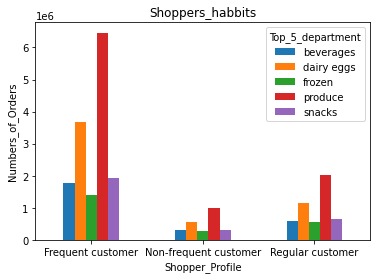

In [73]:
dep_loyal=loyal_dep.plot.bar(title='Shoppers_habbits',xlabel='Shopper_Profile',ylabel='Numbers_of_Orders')
plt.xticks(rotation=0)

In [74]:
# saving
dep_loyal.figure.savefig(os.path.join(path,'Shoppers_dep.png'))

In [75]:
age_loyal=pd.crosstab(ords_custs_merged_2['Age_distribution'],ords_custs_merged_2['frequency_flag'])

In [76]:
age_loyal

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
Age_distribution,,,
Age_18-25,2706926,462084,905813
Age_26-41,5397576,926397,1834863
Age_42-57,5459024,942288,1845773
Age_58>,8075662,1383842,2701020


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Age_18-25'),
  Text(1, 0, 'Age_26-41'),
  Text(2, 0, 'Age_42-57'),
  Text(3, 0, 'Age_58>')])

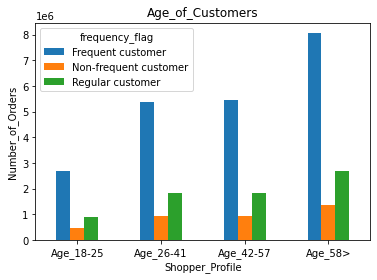

In [77]:
loyal_Age=age_loyal.plot.bar(title='Age_of_Customers',xlabel='Shopper_Profile',ylabel='Number_of_Orders')
plt.xticks(rotation=0)

In [78]:
# saving
loyal_Age.figure.savefig(os.path.join(path,'Age_frequency'))

In [ ]:
# age and loyality of customers

In [79]:
age_loyality=pd.crosstab(ords_custs_merged_2['Age_distribution'],ords_custs_merged_2['loyalty_flag'])

In [80]:
age_loyality

loyalty_flag,Loyal customer,New customer,Regular customer
Age_distribution,,,
Age_18-25,1323104,701218,2050501
Age_26-41,2647178,1386919,4124739
Age_42-57,2716958,1405129,4124998
Age_58>,3992338,2086952,6081234


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Age_18-25'),
  Text(1, 0, 'Age_26-41'),
  Text(2, 0, 'Age_42-57'),
  Text(3, 0, 'Age_58>')])

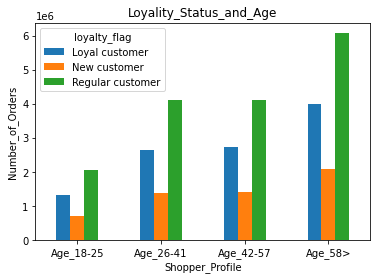

In [81]:
loyality_Age = age_loyality.plot.bar(title='Loyality_Status_and_Age',xlabel='Shopper_Profile',ylabel='Number_of_Orders')
plt.xticks(rotation=0)

In [82]:
# saving
loyality_Age.figure.savefig(os.path.join(path,'Age_and_loyality'))

In [83]:
# Income and region
income_reg= pd.crosstab(ords_custs_merged_2['region'],ords_custs_merged_2['income_group'])

In [84]:
income_reg

income_group,<32K,107K-374K,32K-53K,53K-107K,>374K
region,,,,,
Midwest,105218,2552763,707984,2995558,17113
Northeast,86165,2287323,659704,2721821,9819
South,182229,4243487,1244316,5185779,14908
West,149903,3775651,1076572,4607565,17390


Text(0.5, 1.0, 'Income_by_Region')

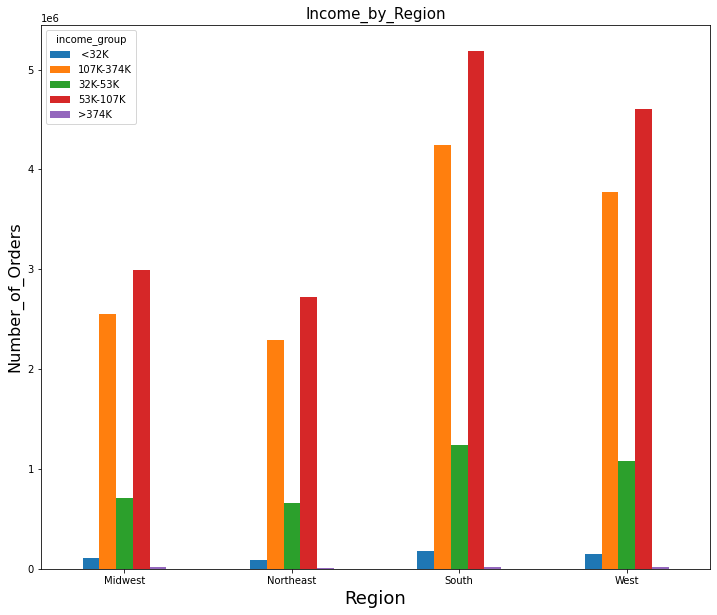

In [102]:
reg_income=income_reg.plot.bar(figsize=(12,10))
plt.xticks(rotation=0)
plt.xlabel('Region', fontsize=18)
plt.ylabel('Number_of_Orders', fontsize=16)
reg_income.set_title('Income_by_Region', fontdict={'fontsize': 15})

In [179]:
# saving
reg_income.figure.savefig(os.path.join(path,'Income_by_regiom'))

In [49]:
# table reminder
ords_custs_merged_2.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,Busiest_day,Busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,Surname,Gender,State,Age,date_joined,Number_of_dependants,fam_status,income,day_of_week,region,activity_flag,Age_distribution,income_group,department_name,Top_5_department
0,2539329,1,1,2,8,NaN,True,196,1.0,0.0,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,beverages,beverages
1,2539329,1,1,2,8,NaN,True,14084,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,dairy eggs,dairy eggs
2,2539329,1,1,2,8,NaN,True,12427,3.0,0.0,Original Beef Jerky,23.0,19.0,4.4,both,NaN,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,snacks,snacks
3,2539329,1,1,2,8,NaN,True,26088,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,NaN,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,snacks,snacks
4,2539329,1,1,2,8,NaN,True,26405,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,NaN,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,households,NaN


In [103]:
# finding corelation beetween Time of order and Age_distribution
Age_time= pd.crosstab(ords_custs_merged_2['Age_distribution'],ords_custs_merged_2['Time_of_the_Day'], dropna = False)

In [104]:
Age_time

Time_of_the_Day,Afternoon,Evening,Morning
Age_distribution,,,
Age_18-25,1919353,708340,1447130
Age_26-41,3839330,1433492,2886014
Age_42-57,3880001,1460729,2906355
Age_58>,5728529,2143680,4288315


Text(0.5, 1.0, 'Time_and_Age')

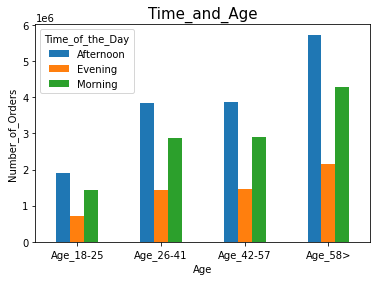

In [106]:
time_age= Age_time.plot.bar(xlabel='Age',ylabel='Number_of_Orders')

plt.xticks(rotation=0)
time_age.set_title('Time_and_Age', fontdict={'fontsize': 15})

In [33]:
# saving
time_age.figure.savefig(os.path.join(path,'Age_and_Time.png'))


In [107]:
# fam_status and time of order
fam_time= pd.crosstab(ords_custs_merged_2['fam_status'],ords_custs_merged_2['Time_of_the_Day'],dropna= False)


In [108]:
fam_time

Time_of_the_Day,Afternoon,Evening,Morning
fam_status,,,
divorced/widowed,1314958,495724,981418
living with parents and siblings,736517,274142,551257
married,10791097,4033337,8097971
single,2524641,943038,1897168


(array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.,
        12000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

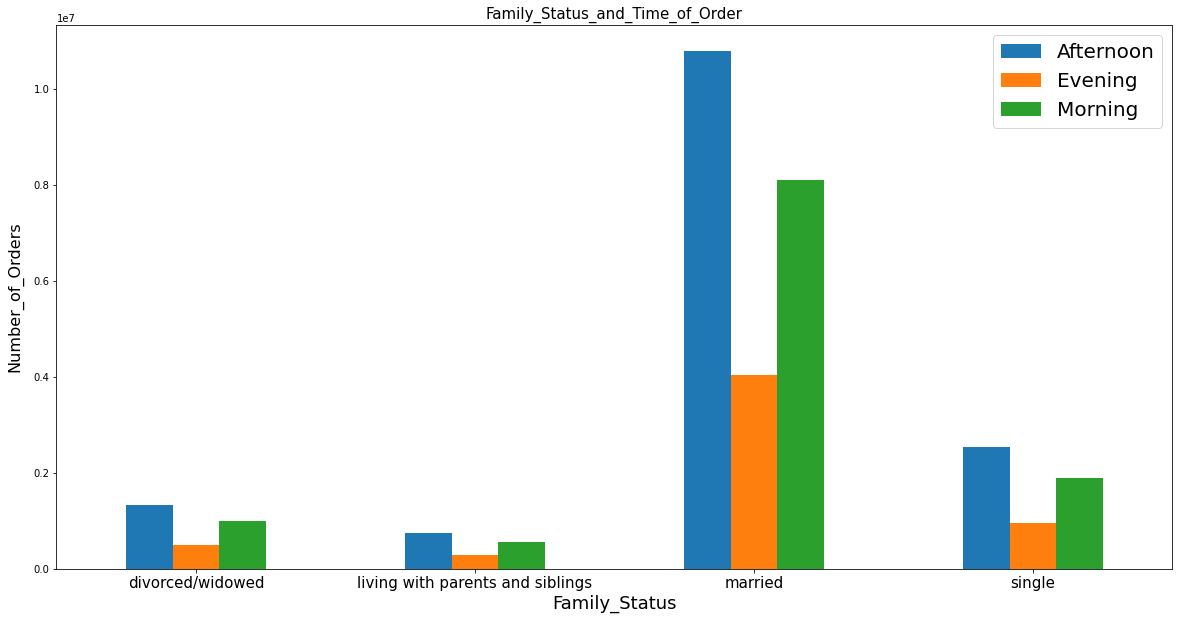

In [121]:
time_fam= fam_time.plot.bar(figsize=(20,10))
plt.xticks(rotation=0)
time_fam.set_title('Family_Status_and_Time_of_Order', fontdict={'fontsize': 15})
plt.xlabel('Family_Status', fontsize=18)
plt.ylabel('Number_of_Orders', fontsize=16, labelpad=10)
plt.legend(fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 10)

In [123]:
# saving
time_fam.figure.savefig(os.path.join(path,'Family_and_Time.png'))


In [124]:
# income and family status
income_family= pd.crosstab(ords_custs_merged_2['income_group'],ords_custs_merged_2['fam_status'], dropna= False)

In [125]:
income_family

fam_status,divorced/widowed,living with parents and siblings,married,single
income_group,,,,
<32K,28488,41903,342099,111025
107K-374K,1704430,20418,9605450,1528926
32K-53K,225505,256257,2524566,682248
53K-107K,828112,1243199,10405991,3033421
>374K,5565,139,44299,9227


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' <32K'),
  Text(1, 0, '107K-374K'),
  Text(2, 0, '32K-53K'),
  Text(3, 0, '53K-107K'),
  Text(4, 0, '>374K')])

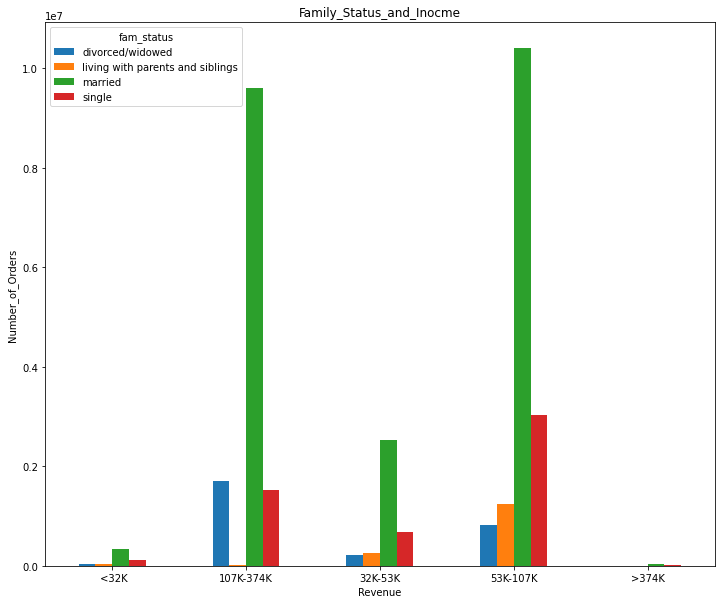

In [126]:
family_income= income_family.plot.bar(title= 'Family_Status_and_Inocme',xlabel= 'Revenue',ylabel='Number_of_Orders',figsize=(12,10))
plt.xticks(rotation=0)

In [127]:
# saving
family_income.figure.savefig(os.path.join(path,'Income_fam_status'))

In [128]:
age_spender= pd.crosstab(ords_custs_merged_2['spending_flag'],ords_custs_merged_2['Age_distribution'],dropna= False)

In [129]:
age_spender

Age_distribution,Age_18-25,Age_26-41,Age_42-57,Age_58>
spending_flag,,,,
High Spender,78683,154062,169131,238159
Low Spender,3996140,8004774,8077954,11922365


(array([0, 1]), [Text(0, 0, 'High Spender'), Text(1, 0, 'Low Spender')])

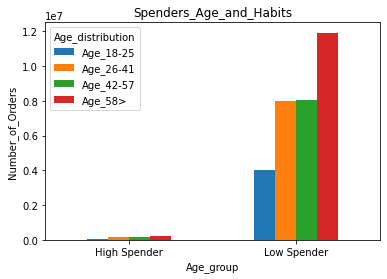

In [130]:
spender_age= age_spender.plot.bar(title= 'Spenders_Age_and_Habits',xlabel='Age_group',ylabel= 'Number_of_Orders')

plt.xticks(rotation=0)

In [131]:
# saving
spender_age.figure.savefig(os.path.join(path,'Spender_age.png'))

In [19]:
# family status and number of orders
ords_custs_merged_2['fam_status'].value_counts().sort_index()

divorced/widowed                     2792100
living with parents and siblings     1561916
married                             22922405
single                               5364847
Name: fam_status, dtype: int64

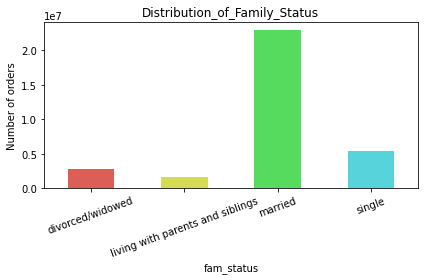

In [132]:
# family status and number of orders
family_status = ords_custs_merged_2['fam_status'].value_counts().sort_index().plot.bar(color = sns.color_palette('hls'), xlabel= 'fam_status',  ylabel= 'Number of orders', title = 'Distribution_of_Family_Status')
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [133]:
# saving
family_status.figure.savefig(os.path.join(path,'family_status.png'))



In [138]:
day_prices=pd.crosstab(ords_custs_merged_2['day_of_week'],ords_custs_merged_2['Price_range'])

In [139]:
day_prices

Price_range,High_price,Low_price,Mid_price_
day_of_week,,,
Friday,64000,1381463,3084841
Monday,51340,1329813,2862020
Saturday,87703,1897856,4267382
Sunday,70046,1781899,3844779
Thursday,52327,1328581,2856081
Tuesday,46489,1211356,2610902
Wednesday,45773,1195353,2571264


(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000., 4000000., 4500000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

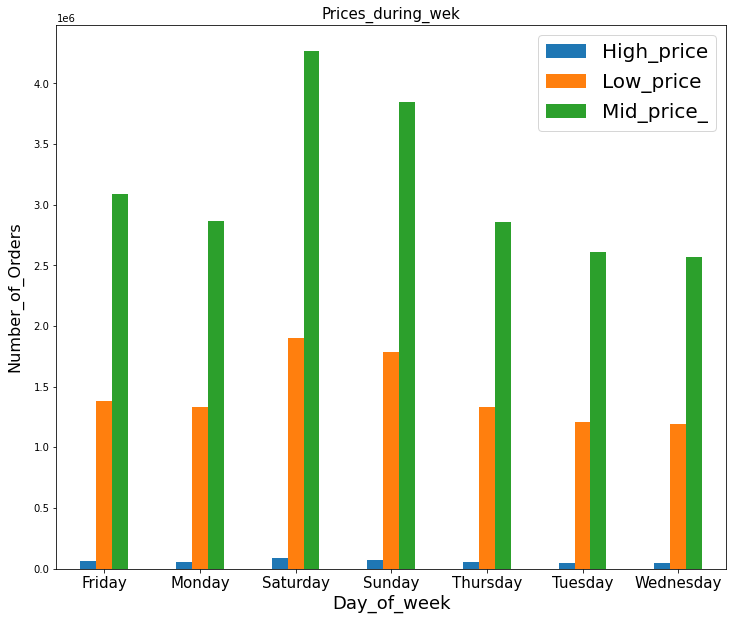

In [140]:
price_day= day_prices.plot.bar(figsize=(12,10))
plt.xticks(rotation=0)
price_day.set_title('Prices_during_wek', fontdict={'fontsize': 15})
plt.xlabel('Day_of_week', fontsize=18)
plt.ylabel('Number_of_Orders', fontsize=16, labelpad=10)
plt.legend(fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 10)

In [141]:
#saving
price_day.figure.savefig(os.path.join(path,'Prices_of_Week.png'))

In [142]:
# spender and time of orders
spender_timeof= pd.crosstab(ords_custs_merged_2['spending_flag'],ords_custs_merged_2['Time_of_the_Day'])

(array([0, 1]), [Text(0, 0, 'High Spender'), Text(1, 0, 'Low Spender')])

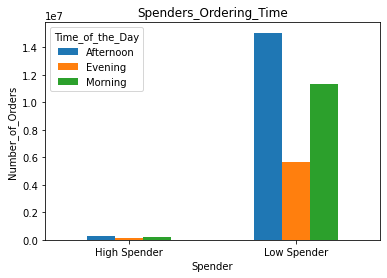

In [143]:
timeof=spender_timeof.plot.bar(title='Spenders_Ordering_Time',xlabel='Spender',ylabel='Number_of_Orders')
plt.xticks(rotation=0)

In [144]:
# saving
timeof.figure.savefig(os.path.join(path,'Spenders_time'))

In [52]:
ords_custs_merged_2['prices'].mean()

11.980225638676366

In [135]:
# replacing missing values with the mean value
ords_custs_merged_2['prices'].fillna(11, inplace=True)

In [136]:
price_range= []

for value in ords_custs_merged_2['prices']:
    if value <=5: 
        price_range.append('Low_price')
    elif (value >5) and (value <= 15):
        price_range.append('Mid_price_')
    elif (value > 15) :
        price_range.append('High_price')
    

In [59]:
price_range

['Mid_price_',
 'Mid_price_',
 'Low_price',
 'Low_price',
 'Low_price',
 'Mid_price_',
 'Low_price',
 'Low_price',
 'Mid_price_',
 'Low_price',
 'Low_price',
 'Mid_price_',
 'Low_price',
 'Low_price',
 'Mid_price_',
 'Low_price',
 'Mid_price_',
 'Low_price',
 'Low_price',
 'Mid_price_',
 'Low_price',
 'Mid_price_',
 'Low_price',
 'Low_price',
 'Mid_price_',
 'Low_price',
 'Mid_price_',
 'Low_price',
 'Mid_price_',
 'Mid_price_',
 'Low_price',
 'Low_price',
 'Mid_price_',
 'Mid_price_',
 'Low_price',
 'Low_price',
 'Mid_price_',
 'Low_price',
 'Low_price',
 'Mid_price_',
 'Low_price',
 'Mid_price_',
 'Mid_price_',
 'Low_price',
 'Low_price',
 'Mid_price_',
 'Mid_price_',
 'Mid_price_',
 'Low_price',
 'Low_price',
 'Mid_price_',
 'Mid_price_',
 'Mid_price_',
 'Mid_price_',
 'Mid_price_',
 'Low_price',
 'Low_price',
 'Low_price',
 'Low_price',
 'Mid_price_',
 'Mid_price_',
 'Mid_price_',
 'Low_price',
 'Mid_price_',
 'Low_price',
 'Low_price',
 'Low_price',
 'Mid_price_',
 'Mid_price_',
 

In [137]:
# adding new column
ords_custs_merged_2['Price_range']= price_range

In [188]:
#check
pd.options.display.max_columns = None
ords_custs_merged_2.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,Busiest_day,Busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,Surname,Gender,State,Age,date_joined,Number_of_dependants,fam_status,income,day_of_week,region,activity_flag,Age_distribution,income_group,Time_of_the_Day,Top_5_department,department_name,Price_range
0,2539329,1,1,2,8,NaN,True,196,1.0,0.0,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Morning,beverages,beverages,Mid_price_
1,2539329,1,1,2,8,NaN,True,14084,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Morning,dairy eggs,dairy eggs,Mid_price_
2,2539329,1,1,2,8,NaN,True,12427,3.0,0.0,Original Beef Jerky,23.0,19.0,4.4,both,NaN,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Morning,snacks,snacks,Low_price
3,2539329,1,1,2,8,NaN,True,26088,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,NaN,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Morning,snacks,snacks,Low_price
4,2539329,1,1,2,8,NaN,True,26405,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,NaN,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Morning,NaN,households,Low_price


## Question 7.

Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [13]:
day_price = ords_custs_merged_2.groupby('day_of_week').agg({'spending': ['min', 'max', 'mean']})

In [14]:
day_price

spending                      
                 min        max       mean
day_of_week                               
Friday           1.0  25005.425  11.637467
Monday           1.0  15006.940  12.277678
Saturday         1.0  25005.425  11.318602
Sunday           1.0  15006.940  11.844261
Thursday         1.0  25005.425  12.582323
Tuesday          1.0  15006.940  12.155313
Wednesday        1.0  25005.425  12.514153

In [64]:
day_price_1= ords_custs_merged_2.groupby('day_of_week').agg({'max_order': ['min', 'max', 'mean']})

In [65]:
day_price_1

max_order                
                  min  max       mean
day_of_week                          
Friday              4  100  32.281263
Monday              4  100  34.432619
Saturday            4  100  31.650033
Sunday              4  100  34.347125
Thursday            4  100  35.508933
Tuesday             4  100  35.073580
Wednesday           4  100  35.633493

In [70]:
age_of_custs= ords_custs_merged_2.groupby('income_group').agg({'prices': ['min', 'max', 'mean']})

In [67]:
age_of_custs

max_order                
                       min  max       mean
Age_distribution                          
Age_18-25                4  100  34.044699
Age_26-41                4  100  33.952590
Age_42-57                4  100  33.970966
Age_58>                  4  100  33.880837

In [200]:
time_of_day=  ords_custs_merged_2.groupby('Time_of_the_Day').agg({'prices': ['min', 'max', 'mean']})

prices                    
                   min      max       mean
Time_of_the_Day                           
Afternoon          1.0  99999.0  12.083786
Evening            1.0  99999.0  11.609005
Morning            1.0  99999.0  12.027173

### Question 8.

Compare your customer profiles with regions and departments.

In [107]:
ords_custs_merged_2.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,Busiest_day,Busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,Surname,Gender,State,Age,date_joined,Number_of_dependants,fam_status,income,day_of_week,region,activity_flag,Age_distribution,income_group,Time_of_the_Day,Top_5_department,department_name,Price_range
0,2539329,1,1,2,8,NaN,True,196,1.0,0.0,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Morning,beverages,beverages,Mid_price_
1,2539329,1,1,2,8,NaN,True,14084,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Morning,dairy eggs,dairy eggs,Mid_price_
2,2539329,1,1,2,8,NaN,True,12427,3.0,0.0,Original Beef Jerky,23.0,19.0,4.4,both,NaN,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Morning,snacks,snacks,Low_price
3,2539329,1,1,2,8,NaN,True,26088,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,NaN,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Morning,snacks,snacks,Low_price
4,2539329,1,1,2,8,NaN,True,26405,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,NaN,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Morning,NaN,households,Low_price


In [145]:
# region and number of children
child_region= pd.crosstab(ords_custs_merged_2['Number_of_dependants'],ords_custs_merged_2['region'])

In [146]:
child_region

region,Midwest,Northeast,South,West
Number_of_dependants,,,,
0,1589879,1428913,2721460,2416695
1,1623040,1452875,2679358,2384723
2,1584795,1427598,2743592,2394231
3,1580922,1455446,2726309,2431432


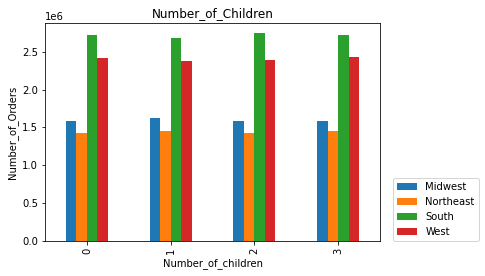

In [147]:
region_child=child_region.plot.bar(title= 'Number_of_Children',xlabel='Number_of_children',ylabel='Number_of_Orders')
plt.legend(loc=(1.04,0))

In [148]:
#saving
region_child.figure.savefig(os.path.join(path,'region_child.png'))

In [149]:
# spenders and regions
spender_reg= pd.crosstab(ords_custs_merged_2['region'],ords_custs_merged_2['spending_flag'])

In [150]:
spender_reg

spending_flag,High Spender,Low Spender
region,,
Midwest,128814,6249822
Northeast,109159,5655673
South,211695,10659024
West,190367,9436714


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

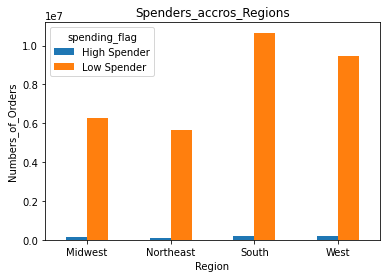

In [151]:
reg_spender= spender_reg.plot.bar(title='Spenders_accros_Regions',xlabel='Region',ylabel='Numbers_of_Orders')
plt.xticks(rotation=0)

In [152]:
#saving
reg_spender.figure.savefig(os.path.join(path,'spender_region.png'))

In [108]:
# top departments by region


Creating new column of departments

In [39]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 1, 'department_name'] = 'frozen'

In [40]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 2, 'department_name'] = 'other'

In [41]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 3 , 'department_name'] = 'bakery'

In [42]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 4 ,'department_name'] = 'produce'

In [43]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 5, 'department_name'] = 'alcohol'

In [44]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 6 ,'department_name'] = 'international'

In [45]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 7, 'department_name'] = 'beverages'

In [46]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 8, 'department_name'] = 'pets'

In [47]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 9, 'department_name'] = 'dry goods pasta'

In [48]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 10, 'department_name'] = 'bulk'

In [49]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 11,'department_name'] = 'personal care'

In [50]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 12,'department_name'] = 'meat seafood'

In [51]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 13, 'department_name'] = 'pantry'

In [52]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 14,'department_name'] = 'breakfast'

In [53]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 15, 'department_name'] = 'canned goods'

In [54]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 16, 'department_name'] = 'dairy eggs'

In [55]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 17,'department_name'] = 'households'
                        

In [56]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 18,  'department_name'] = 'babies'

In [57]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 19, 'department_name'] = 'snacks'

In [58]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 20, 'department_name'] = 'deli'

In [59]:
 ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 21, 'department_name'] = 'missing'

In [60]:
# check
ords_custs_merged_2['department_name'].value_counts()

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
households          738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department_name, dtype: int64

In [61]:
reg_dep= pd.crosstab( ords_custs_merged_2['region'], ords_custs_merged_2['department_name'],dropna= False)

In [62]:
reg_dep

department_name,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,households,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,30603,82781,228427,520969,136189,6845,208664,1052659,203825,170082,...,146550,52839,138340,13946,7011,368660,87885,18409,1858464,563851
Northeast,26542,75139,208599,483418,123574,5802,186755,954026,186817,151816,...,131485,46891,124620,12374,6585,329445,78815,18601,1665839,514675
South,51624,143654,388815,898940,234251,11533,356015,1796969,349419,287444,...,243070,89142,235752,23193,12212,622436,150350,31269,3160551,957346
West,44927,122228,346587,784796,209019,10393,316624,1595093,311188,257285,...,217561,80381,210215,19632,10483,554828,130522,29437,2794437,851678


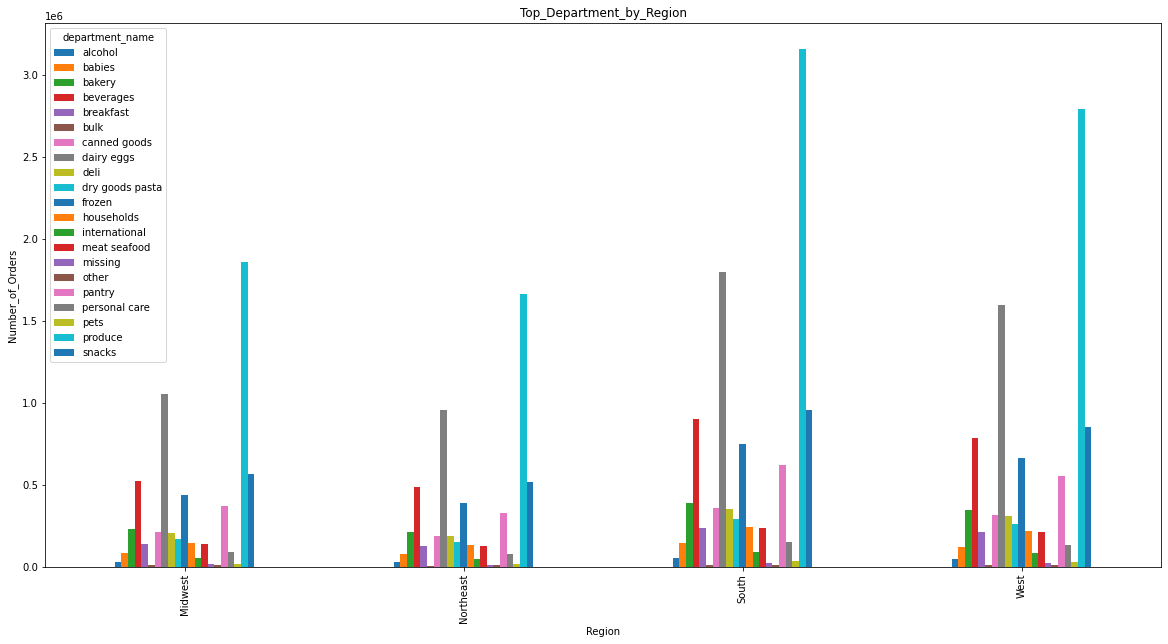

In [153]:
dep_reg=reg_dep.plot.bar(title='Top_Department_by_Region',xlabel='Region',ylabel='Number_of_Orders',figsize=(20,10))


In [ ]:
# it is hard to read so I will find  top 5 


In [64]:
ords_custs_merged_2[['department_id', 'department_name']].value_counts()

department_id  department_name
4.0            produce            9479291
16.0           dairy eggs         5398747
19.0           snacks             2887550
7.0            beverages          2688123
1.0            frozen             2234743
13.0           pantry             1875369
3.0            bakery             1172428
15.0           canned goods       1068058
20.0           deli               1051249
9.0            dry goods pasta     866627
17.0           households          738666
12.0           meat seafood        708927
14.0           breakfast           703033
11.0           personal care       447572
18.0           babies              423802
6.0            international       269253
5.0            alcohol             153696
8.0            pets                 97716
21.0           missing              69145
2.0            other                36291
10.0           bulk                 34573
dtype: int64

In [65]:
# Deriving new column
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 4, 'Top_5_department'] = 'produce'                   
                 
                          
                          
                          

In [66]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 16, 'Top_5_department'] = 'dairy eggs'

In [67]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 19, 'Top_5_department'] = 'snacks'

In [68]:
ords_custs_merged_2.loc[ords_custs_merged_2['department_id'] == 7, 'Top_5_department'] = 'beverages'

In [69]:
ords_custs_merged_2.loc [ords_custs_merged_2['department_id'] == 1, 'Top_5_department'] = 'frozen'

In [70]:
ords_custs_merged_2['Top_5_department'].value_counts()

produce       9479291
dairy eggs    5398747
snacks        2887550
beverages     2688123
frozen        2234743
Name: Top_5_department, dtype: int64

In [83]:
ords_custs_merged_2.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,Busiest_day,Busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,Surname,Gender,State,Age,date_joined,Number_of_dependants,fam_status,income,day_of_week,region,activity_flag,Age_distribution,income_group,Time_of_the_Day,Top_5_department,department_name
0,2539329,1,1,2,8,NaN,True,196,1.0,0.0,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Morning,beverages,beverages
1,2539329,1,1,2,8,NaN,True,14084,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Morning,dairy eggs,dairy eggs
2,2539329,1,1,2,8,NaN,True,12427,3.0,0.0,Original Beef Jerky,23.0,19.0,4.4,both,NaN,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Morning,snacks,snacks
3,2539329,1,1,2,8,NaN,True,26088,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,NaN,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Morning,snacks,snacks
4,2539329,1,1,2,8,NaN,True,26405,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,NaN,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Morning,NaN,households


In [156]:
# Top 5 depertments by region
reg_dep_top_5= pd.crosstab( ords_custs_merged_2['region'], ords_custs_merged_2['Top_5_department'],dropna= False)

In [157]:
reg_dep_top_5

Top_5_department,beverages,dairy eggs,frozen,produce,snacks
region,,,,,
Midwest,520969,1052659,435506,1858464,563851
Northeast,483418,954026,390918,1665839,514675
South,898940,1796969,747900,3160551,957346
West,784796,1595093,660419,2794437,851678


(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

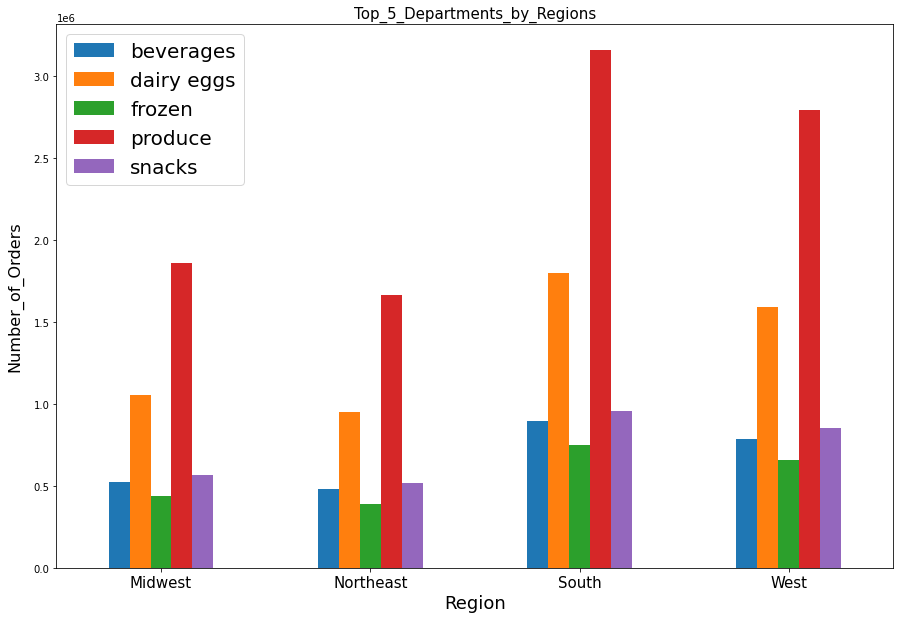

In [158]:
top_5_reg= reg_dep_top_5.plot.bar(figsize=(15,10))
plt.xticks(rotation=0)
top_5_reg.set_title('Top_5_Departments_by_Regions', fontdict={'fontsize': 15})
plt.xlabel('Region', fontsize=18)
plt.ylabel('Number_of_Orders', fontsize=16, labelpad=10)
plt.legend(fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 10)

In [159]:
#saving
top_5_reg.figure.savefig(os.path.join(path,'Top_5_reg.png'))


In [162]:
# Family_status and top 5 products
famstat_dep=pd.crosstab(ords_custs_merged_2['fam_status'],ords_custs_merged_2['Top_5_department'])

(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000., 7000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

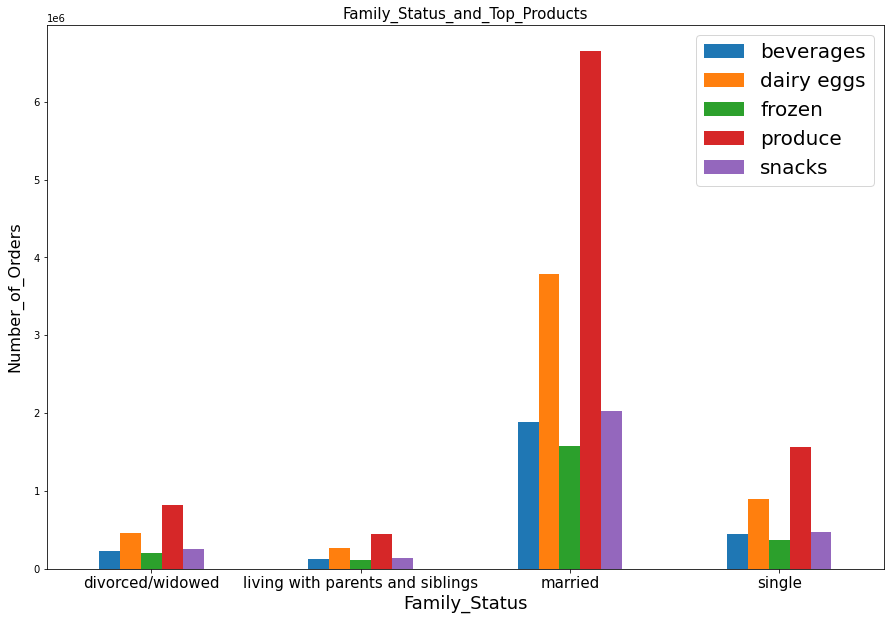

In [164]:
stat_fam=famstat_dep.plot.bar(figsize=(15,10))
plt.xticks(rotation=0)
stat_fam.set_title('Family_Status_and_Top_Products', fontdict={'fontsize': 15})
plt.xlabel('Family_Status', fontsize=18)
plt.ylabel('Number_of_Orders', fontsize=16, labelpad=10)
plt.legend(fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 10)

In [165]:
# saving
stat_fam.figure.savefig(os.path.join(path,'Family_top_products.png'))

In [10]:
# region and price range
reg_range= pd.crosstab(ords_custs_merged_2['region'],ords_custs_merged_2['Price_range'],dropna= False)

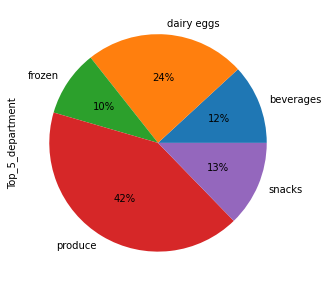

In [168]:
# Top 5 departments
Top_5Pie= ords_custs_merged_2['Top_5_department'].value_counts().sort_index().plot.pie(autopct='%.0f%%', figsize=(5,5),)

In [169]:
Top_5Pie.figure.savefig(os.path.join(path,'Pie_departments.png'))

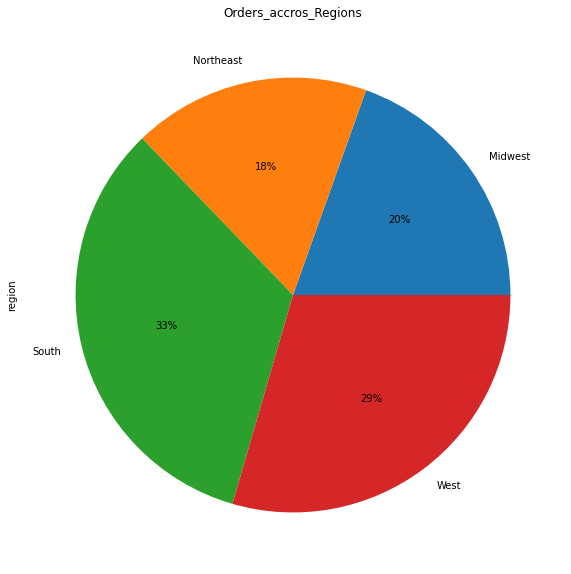

In [176]:
# Orders by regions
pie_reg =ords_custs_merged_2 ['region'].value_counts().sort_index().plot.pie(title= 'Orders_accros_Regions',autopct='%.0f%%', figsize=(10,10))



In [177]:
#saving
pie_reg.figure.savefig(os.path.join(path,'Pie_regions.png'))

In [178]:
# customer loyality
loyal_reg= pd.crosstab(ords_custs_merged_2['region'],ords_custs_merged_2['loyalty_flag'],dropna= False)

In [179]:
loyal_reg

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2048106,1092229,3238301
Northeast,1905685,984538,2874609
South,3541557,1854577,5474585
West,3184230,1648874,4793977


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

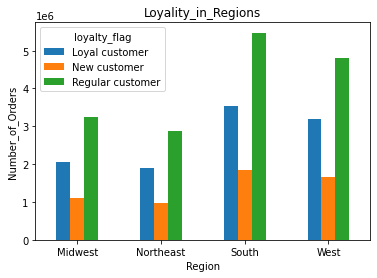

In [180]:
reg_loyal= loyal_reg.plot.bar(title='Loyality_in_Regions',xlabel='Region',ylabel='Number_of_Orders')
plt.xticks(rotation=0)

In [181]:
#saving
reg_loyal.figure.savefig(os.path.join(path,'Loyality_in_regions.png'))

In [182]:
# age groups in regions
age_reg= pd.crosstab(ords_custs_merged_2['Age_distribution'],ords_custs_merged_2['region'],dropna= False)

In [183]:
age_reg

region,Midwest,Northeast,South,West
Age_distribution,,,,
Age_18-25,785311,716309,1386801,1186402
Age_26-41,1582899,1425031,2753219,2397687
Age_42-57,1651054,1450607,2689288,2456136
Age_58>,2359372,2172885,4041411,3586856


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Age_18-25'),
  Text(1, 0, 'Age_26-41'),
  Text(2, 0, 'Age_42-57'),
  Text(3, 0, 'Age_58>')])

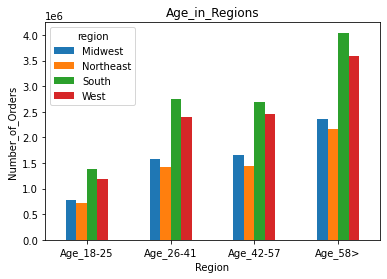

In [184]:
reg_age=age_reg.plot.bar(title='Age_in_Regions',xlabel='Region',ylabel='Number_of_Orders')
plt.xticks(rotation=0)

In [185]:
#saving
reg_age.figure.savefig(os.path.join(path,'Age_in_Regions.png'))

In [90]:
# table reminder
ords_custs_merged_2.head()


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,Busiest_day,Busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,Surname,Gender,State,Age,date_joined,Number_of_dependants,fam_status,income,day_of_week,region,activity_flag,Age_distribution,income_group,Price_range,department_name,Top_5_department
0,2539329,1,1,2,8,NaN,True,196,1.0,0.0,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Mid_price_,beverages,beverages
1,2539329,1,1,2,8,NaN,True,14084,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Mid-range product,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Mid_price_,dairy eggs,dairy eggs
2,2539329,1,1,2,8,NaN,True,12427,3.0,0.0,Original Beef Jerky,23.0,19.0,4.4,both,NaN,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Low_price,snacks,snacks
3,2539329,1,1,2,8,NaN,True,26088,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,NaN,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Low_price,snacks,snacks
4,2539329,1,1,2,8,NaN,True,26405,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,NaN,Regularly busy,Regularly busy,Average_orders,11,Regular customer,6.367797,Low Spender,20.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Monday,South,Normal activity,Age_26-41,32K-53K,Low_price,households,NaN


In [188]:
# family status and regions
fam_reg= pd.crosstab(ords_custs_merged_2['fam_status'],ords_custs_merged_2['region'],dropna= False)

In [187]:
fam_reg

region,Midwest,Northeast,South,West
fam_status,,,,
divorced/widowed,536275,504698,927522,823605
living with parents and siblings,301144,270061,533418,457293
married,4487613,4065858,7615841,6753093
single,1053604,924215,1793938,1593090


(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000., 7000000., 8000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

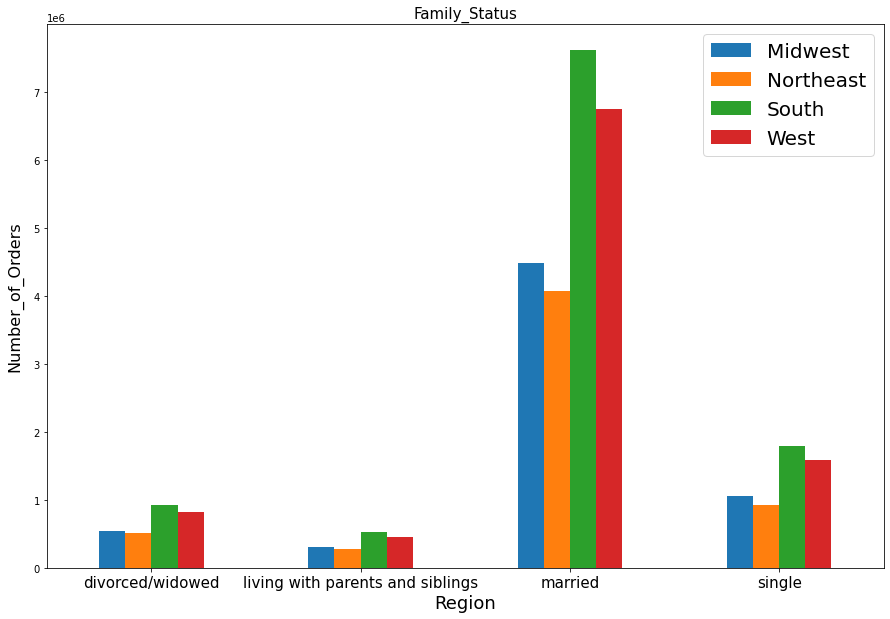

In [193]:
reg_fam= fam_reg.plot.bar(figsize=(15,10))
plt.xticks(rotation=0)
reg_fam.set_title('Family_Status', fontdict={'fontsize': 15})
plt.xlabel('Region', fontsize=18)
plt.ylabel('Number_of_Orders', fontsize=16, labelpad=10)
plt.legend(fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 10)

In [194]:
#saving
reg_fam.figure.savefig(os.path.join(path,'Fam_stat_in_Regions.png'))

Text(0, 0.5, 'Number_of_Orders')

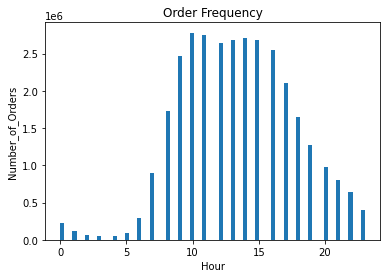

In [195]:
#order frequency
hist_1= ords_custs_merged_2['order_hour_of_day'].plot.hist(title='Order Frequency',bins = 75)
plt.xlabel('Hour')
plt.ylabel('Number_of_Orders')

In [196]:
#saving
hist_1.figure.savefig(os.path.join(path,'Order_frequency_1'))


In [197]:
# Spenders in families
fam_spenders= pd.crosstab(ords_custs_merged_2['spending_flag'],ords_custs_merged_2['fam_status'])

In [137]:
fam_spenders

fam_status,divorced/widowed,living with parents and siblings,married,single
spending_flag,,,,
High Spender,53193,29658,455373,101811
Low Spender,2738907,1532258,22467032,5263036


(array([       0.,  5000000., 10000000., 15000000., 20000000., 25000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

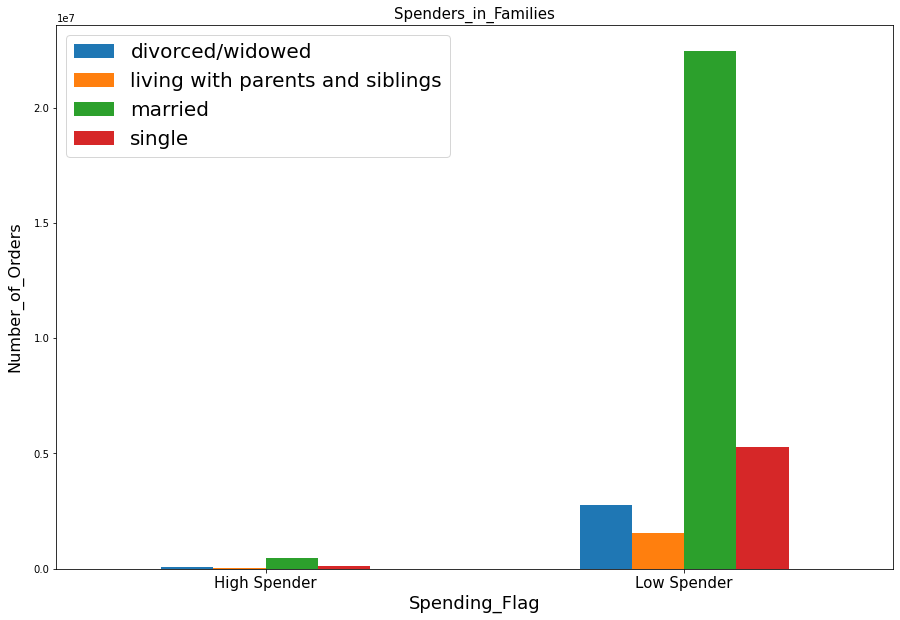

In [198]:
spenders_fam= fam_spenders.plot.bar(figsize=(15,10))
plt.xticks(rotation=0)
spenders_fam.set_title('Spenders_in_Families', fontdict={'fontsize': 15})
plt.xlabel('Spending_Flag', fontsize=18)
plt.ylabel('Number_of_Orders', fontsize=16, labelpad=10)
plt.legend(fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 10)

In [199]:
# saving
spenders_fam.figure.savefig(os.path.join(path,'Spenders_in_Families.png'))

In [201]:
# age_and family status
age_stat=pd.crosstab(ords_custs_merged_2['Age_distribution'],ords_custs_merged_2['fam_status'])

In [202]:
age_stat

fam_status,divorced/widowed,living with parents and siblings,married,single
Age_distribution,,,,
Age_18-25,0,1561916,1507947,1004960
Age_26-41,0,0,6108304,2050532
Age_42-57,0,0,6211791,2035294
Age_58>,2792100,0,9094363,274061


(array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

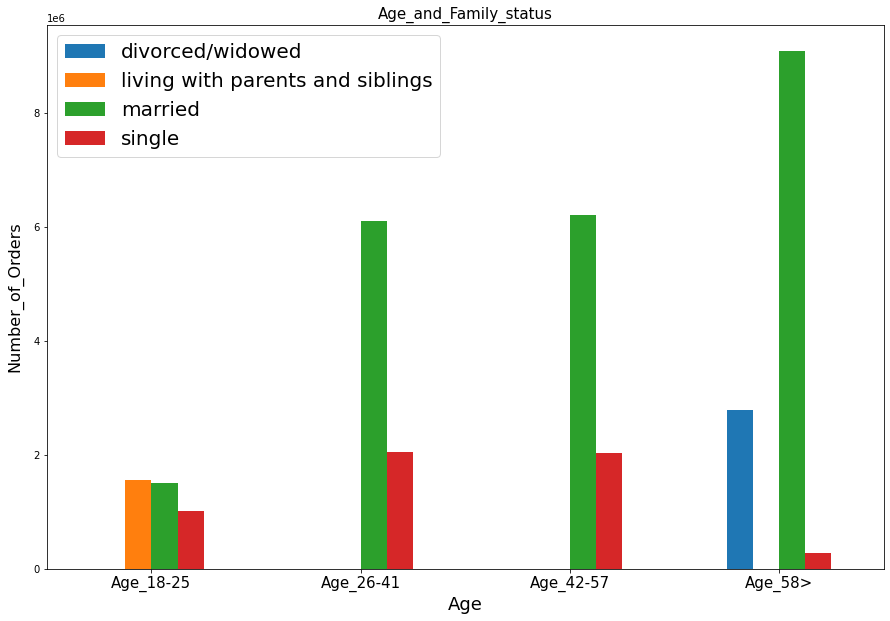

In [203]:
stat_age= age_stat.plot.bar(figsize=(15,10))
plt.xticks(rotation=0)
stat_age.set_title('Age_and_Family_status', fontdict={'fontsize': 15})
plt.xlabel('Age', fontsize=18)
plt.ylabel('Number_of_Orders', fontsize=16, labelpad=10)
plt.legend(fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 10)

In [204]:
# saving
stat_age.figure.savefig(os.path.join(path,'Age_fam_status'))

Text(0, 0.5, 'Number_of_Orders')

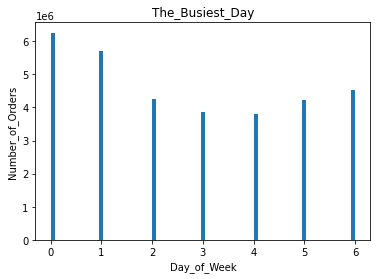

In [222]:
# busiest day
hist_2= ords_custs_merged_2['order_dow'].plot.hist(title='The_Busiest_Day',bins=75)
plt.xlabel('Day_of_Week')
plt.ylabel('Number_of_Orders')

In [223]:
#saving
hist_2.figure.savefig(os.path.join(path,'Busiest_day'))


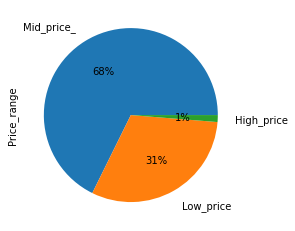

In [67]:
pie_price =ords_custs_merged_2 ['Price_range'].value_counts().plot.pie(autopct='%1.0f%%', labeldistance=1.2)

In [74]:
pie_price.figure.savefig(os.path.join(path,'Pie_price'))

In [13]:
ords_custs_merged_2.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
order_dow                    int64
order_hour_of_day            int64
days_since_prior_order     float64
first_order                   bool
product_id                   int32
add_to_cart_order          float64
reordered                  float64
product_name                object
aisle_id                   float64
department_id              float64
prices                     float64
_merge                    category
price_range_loc             object
busiest_day                 object
Busiest_day                 object
Busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
spending                   float64
spending_flag               object
frequency                  float64
frequency_flag              object
Surname                     object
Gender                      object
State                       object
Age                 

In [207]:
ords_custs_merged_2.to_pickle(r'D:\orders7\ords_final.pkl')